In [ ]:

### Trading MLoftware to track option market and advise the strategy 
### according to several features including volume trend, open interest trend, delta
### it also back trace option strategy performance via stored data is a s

## FINNHUB API USAGE 

In [31]:
import requests as requests
import pprint
import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
from trade_api.finnhub_api import Finnapi as Finnapi
from trade_api.tda_api  import Td as Td
from trade_api.ib_api import ibapi as ibapi
from datetime import date as date
from ipywidgets import widgets
from IPython.core.magic import register_cell_magic
from IPython.display import HTML, display
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import model_from_json
from trade_api.tda_api import Td as Td
from keras.preprocessing.sequence import TimeseriesGenerator
from optionML import getResultByType

In [ ]:
def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

In [ ]:
f = Finnapi('', 2)
f.curr_symbol = 'LYFT'

In [ ]:
response = f.getOptionChain()

In [ ]:
(s_list, oi_list, v_list, p_list, b_list, a_list) = f.filter_options(response, '2020-01-17', 'PUT', 50, 60, 0, 0)

In [ ]:

print(date.today())
plt.plot(np.array(s_list), np.array(oi_list), color='r')
plt.plot(np.array(s_list), np.array(v_list), color='b')

In [ ]:
(s_list, oi_list, v_list,p_list, b_list, a_list) = f.filter_options(response, '2020-02-21', 'PUT', 30, 55, 100, 0)
(s_list_f, oi_list_f, v_list_f,p_list_f, b_list_f, a_list_f) = f.filter_options(response, '2020-01-17', 'PUT', 30, 55, 100, 0)

In [ ]:

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharex=ax, sharey=ax)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
print(s_list)
ax.plot(np.array(s_list), np.array(oi_list), 'ro', label="2020-01-17 open interest")
ax.plot(np.array(s_list), np.array(v_list), 'g^', label= '2020-01-17 volume')
ax.legend()
ax2.plot(np.array(s_list_f), np.array(oi_list_f), 'ro', label='2019-02-21 open interest')
ax2.plot(np.array(s_list_f), np.array(v_list_f), 'g^', label='2019-02-21 volume')
ax2.legend()
ax3.plot(np.array(s_list), np.array(b_list), 'ro', label='2019-01-17 bid')
ax3.plot(np.array(s_list), np.array(a_list), 'g^', label='2019-01-17 ask')
ax3.legend()
ax4.plot(np.array(s_list_f), np.array(b_list_f), 'ro', label='2019-02-21 bid')
ax4.plot(np.array(s_list_f), np.array(a_list_f), 'g^', label='2019-02-21 ask')
ax4.legend()

In [ ]:
## TD Ameritrade API USAGE

In [ ]:
td = None

In [ ]:
def getOpts(user, secrete, option_parameters):
    td = Td.init(user, secrete)
    return(td.get_option_chain(option_parameters))

In [ ]:
def displayTdaOptions(df):
    print(df)
    exp_date = np.unique(df.expirationDate)
    print("all_exp_date", exp_date)
    colorcodeV = ['k*-', 'k^-', 'ko-', 'k^-', 'k--', 'k^-', 'ko-', 'k.-']
    colorcodeOI = ['g--', 'b-', 'r--', 'g--', 'g.-', 'g^-', 'g.-', 'g^-']
    i = 0
    j = 0
    num_subplots = exp_date.size
    ncol = 2
    nrow = np.int(np.floor(num_subplots/2))
    fig, ax = plt.subplots(nrow,2, figsize=(15,10))
    e = exp_date[0]
    for i in list(range(0,nrow)):
        for j in list(range(0,ncol)):
            c1 = colorcodeV[i]
            c2 = colorcodeOI[i]
            if nrow == 1:
                ax[j].plot(df[df['expirationDate'] == e].strikePrice, df[df['expirationDate']==e].totalVolume, c1, label='exp_date' + e + ' vol')
                ax[j].plot(df[df['expirationDate'] == e].strikePrice, df[df['expirationDate']==e].openInterest, c2, label='exp_date' + e + ' oi')
                ax[j].legend()
            else:
                ax[i][j].plot(df[df['expirationDate'] == e].strikePrice, df[df['expirationDate']==e].totalVolume, c1, label='exp_date' + e + ' vol')
                ax[i][j].plot(df[df['expirationDate'] == e].strikePrice, df[df['expirationDate']==e].openInterest, c2, label='exp_date' + e + ' oi')
                ax[i][j].legend()
                ax[i][j].legend()
            j = j + 1
            if j < 2:
                e = exp_date[ncol*i + j]
            
        i = i + 1

In [ ]:
##### from ipywidgets import widgets
text_user = widgets.Text(description="user")
display(text_user)
text_pass = widgets.Password(description='Password:', placeholder='Make it long!')
display(text_pass)
submit = widgets.Button(description="submit")
display(submit)
output = widgets.Output()
user = ''
secrete = ''

option_parameters = {"symbol": 'LYFT', "contractType": 'CALL', "strikeCount": 15, 
                     "monthIncrement":2, "strike": '',
                     "interested_columns": ['expirationDate', 'strikePrice','totalVolume', 'openInterest', 'last', 'bid', 'ask', 'highPrice', 'lowPrice'],
                     "monthlyOption": True}
def on_button_clicked(b):
    print("clicked")
    user = text_user.value
    print("user", user)
    secrete = text_pass.value
    df = getOpts(user, secrete, option_parameters)
    displayTdaOptions(df)
submit.on_click(on_button_clicked)

In [ ]:
option_parameters2= {"periodType": 'year',"frequencyType": 'daily', "period":1, "frequency": 1}

In [ ]:
td = Td.init(user, secrete)
df = td.get_price_history('DIS', None, None, option_parameters2)


In [ ]:
print(df)

In [ ]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(221)
ax.plot(df["datetime"], df["close"], color='r')
ax2 = f.add_subplot(222)
ax2.plot(df["datetime"], df["volume"], color='k')

In [ ]:
curQuote = td.get_quotes('DIS')
print(curQuote['DIS']["lastPrice"])
print(curQuote['DIS']["totalVolume"])
print(np.mean(df['volume']), np.std(df['volume']), df['volume']/curQuote['DIS']["totalVolume"])

In [ ]:
df = td.get_price_history('TSLA', None, None, option_parameters2)
print(df)

In [ ]:
plt.plot(df["datetime"], df["close"])

In [ ]:
## IBKR API USAGE

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
myIb = ibapi('127.0.0.1', 4001,847)
data = myIb.reqScannerOption()
symbols = []
for d in data:
    #print(d.contractDetails.contract.symbol)
    c = d.contractDetails.contract
    #genericTickers = "100,101,221"
    #p = myIb.reqMktPrice(c, genericTickers)
    symbols.append(d.contractDetails.contract.symbol)
myIb.disconnect()   
s_list = list()
v_list = list()
p_list = list()
last_size = list()
threshold = 20
for s in symbols:
    curQuote = td.get_quotes(s)[s]
    if (curQuote["lastPrice"] < threshold):
        continue
    else:
        s_list.append(s)
        v_list.append(curQuote["totalVolume"])
        p_list.append(curQuote["lastPrice"])
        last_size.append(curQuote["regularMarketLastSize"])
print(len(v_list), len(p_list), len(last_size))
hot_scanner_data = pd.DataFrame(data = {"symbol": s_list, "volume": v_list, "price": p_list, "last_size": last_size})
print(hot_scanner_data)


In [ ]:
hot_scanner_data_sorted = hot_scanner_data.sort_values(by = ["volume"])


In [ ]:
print(hot_scanner_data_sorted)

In [ ]:
import json
json.loads("{\"resolution\": \"D\", \"count\": 120}")
type("{\"resolution\": \"D\", \"count\": 120}")

In [ ]:
tsla_ph = getResultByType('price_history', '2048', 'TSLA', "{\"resolution\": \"D\", \"count\": 120}")

In [ ]:
#print(tsla_ph)
closing_vol = tsla_ph.iloc[:, [0,6]]
#print(closing_vol)
sc = MinMaxScaler(feature_range=(0, 1))
transformed_dt = sc.fit_transform(closing_vol)
print(transformed_dt.shape)
df = pd.DataFrame(transformed_dt)
print(df.shape)
reshape_df = df.values.reshape(df.shape[0], df.shape[1], 1)
X = df.iloc[0:transformed_dt.shape[0]-60,:]
Y = df.iloc[transformed_dt.shape[0]-60:, 0:1]
print(X)
print(Y)
print(reshape_df.shape)

In [ ]:

symbol = 'SPY'
parameters = ''
code = '2048'
date_range = "1252,732"
(train_range, test_range) = date_range.split(',')

td = None
sc = MinMaxScaler(feature_range=(0, 1))
def getTestParameters(range):
    return "{\"resolution\": \"D\", \"count\": 732}"


from predictive_model import getTrainParameters,preprocess_files, model, predict, save, load


In [ ]:

(X_train, Y_train,X_train_unscaled, Y_train_unscaled)  = preprocess_files(symbol, code, getTrainParameters(train_range))
(X_test, Y_test, X_test_unscaled, Y_test_unscaled) = preprocess_files(symbol, code, getTestParameters(test_range))


In [ ]:
output_filename =  "models" + os.sep + symbol + "_model"
if output_filename is not None and os.path.exists(output_filename+".json"):
    my_model = load(output_filename + ".json", output_filename + ".h5")
else:
    my_model = model(X_train, Y_train)
    save(my_model, output_filename)
    


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


In [ ]:
predicted = predict(my_model, X_test)

In [ ]:
plt.plot(predicted, color='r')
plt.plot(Y_test_unscaled)

In [27]:
import pandas as pd
import numpy as np
import numpy.ma as ma
from trade_api.tda_api import Td
from trade_api.mongo_api import mongo_api
import os as os
import sys as sys
import json
import csv
import datetime
from analyze_historical import OptionStats
from optionML import getResultByType
import timedelta
from util import debug_print, append_df, load_watch_lists
from trade_api.db_api import read_one_stock_quote, getStockDesc, get_stock_price_history, recordExists
from trade_api.calculate_iv import newton_vol_call,newton_vol_put,newton_vol_call_div,newton_vol_put_div
from start import readTable

In [6]:
candles = readTable('stockcandles')

In [88]:
candles_aapl = candles[candles.symbol == 'AAPL']

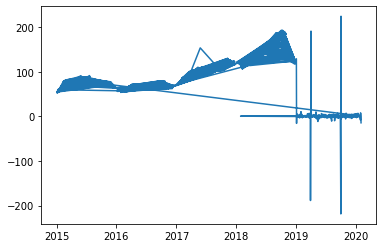

In [89]:
plt.plot(candles_aapl.date, candles_aapl.chg)

In [90]:
def update_close_forall(date_range):
    m = mongo_api()
    d1,d2 = date_range.split(",")
    date1 = datetime.datetime.strptime(d1, '%Y%m%d');
    date2 = datetime.datetime.strptime(d2, '%Y%m%d')
    df_all =  m.read_df('stockcandles', False, '*', [], {'$and': [{'date': {'$gte': date1}}, {'date':{'$lte': date2}}]}, {})
    df_all = df_all.sort_values(["symbol", "date"])
    df_out = None
    for s in set(df_all.symbol):
        df_s = df_all.loc[df_all.symbol == s]
        df_s = df_s.sort_values("date")
        df_s_first_index = df_s.index[0]
        df_s["prev_c"] = df_s["close"].shift(periods=1, fill_value=0)
        df_s.loc[df_s_first_index, "prev_c"] = df_s.loc[df_s_first_index, "close"]
        df_s["chg"] = df_s["close"] - df_s["prev_c"]
        df_out = append_df(df_out, df_s)
    return df_out

In [104]:
df = update_close_forall("20150102,20200131")


In [113]:
df.to_pickle('20150102_20200131_candles.pickle')


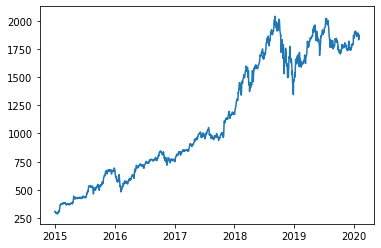

In [111]:
plt.plot(df_amzn.date, df_amzn.prev_c)

In [112]:
df_abbv[df_abbv.chg == max(df_abbv.chg)]

,_id,date,open,high,low,last,volume,implied vol,close,symbol,d_index,month,year,prev_c,chg,ho_spread,cl_spread
11790,5e30d9469e7c895532060397,2018-01-26 21:00:00,114.5,125.86,113.5,NaN,19600478.0,NaN,123.21,ABBV,26,1.0,2018.0,108.3,14.91,11.36,9.71
